In [1]:
ufo_file = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/ufo.csv'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv(ufo_file)

In [4]:
data.describe() # sprawdźmy, co mamy...

,City,Colors Reported,Shape Reported,State,Time
count,18216,2882,15597,18241,18241
unique,6476,27,27,52,16145
top,Seattle,RED,LIGHT,CA,11/16/1999 19:00
freq,187,780,2803,2529,27


In [5]:
data["City"].value_counts() # Seattle, NYC, Phoenix, Houston, LV...

Seattle                187
New York City          161
Phoenix                137
Houston                108
Las Vegas              105
Portland               102
San Diego              101
Los Angeles             98
Chicago                 73
Austin                  62
Miami                   60
Tucson                  58
Columbus                55
Albuquerque             54
Dallas                  52
Tacoma                  52
San Francisco           51
St. Louis               51
Spokane                 49
Salem                   48
Auburn                  48
Jacksonville            48
Salt Lake City          46
Sacramento              46
Gilbert                 45
Colorado Springs        44
Denver                  44
San Antonio             43
Springfield             43
Reno                    42
                      ... 
Winsted                  1
Street                   1
Barronvale               1
Keweenaw Peninsual       1
Mexia                    1
Mountain Village         1
S

In [6]:
data["State"].value_counts()

CA    2529
WA    1322
TX    1027
NY     914
FL     837
AZ     738
OH     667
IL     613
PA     598
MI     591
OR     534
MO     448
NJ     370
CO     367
WI     357
NC     356
IN     326
GA     325
MA     322
VA     299
TN     286
NV     284
MN     254
KY     244
NM     241
CT     225
MD     215
AR     206
AL     193
UT     193
OK     193
ME     181
KS     176
LA     174
SC     166
IA     162
MT     144
MS     139
WV     132
ID     130
NH     125
AK     116
NE     101
HI      85
WY      69
RI      67
SD      57
ND      51
VT      44
DE      43
Fl       4
Ca       1
Name: State, dtype: int64

In [7]:
# trzeba poprawić niektóre wpisy, bo są małymi literami - używamy funkcji upper ze stringów, żeby zamienić na duże litery
data["State"] = data["State"].apply(str.upper)

<Container object of 50 artists>

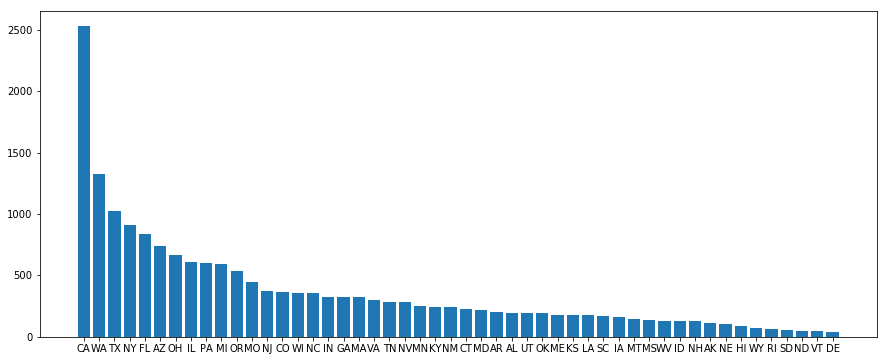

In [8]:
ufo_states = data["State"].value_counts() 
plt.figure(figsize=(15,6))
plt.bar(range(len(ufo_states)), ufo_states, tick_label=ufo_states.index)
# największe freaki: California, Washington, Texas, NY, Florida

In [9]:
data.isnull().describe() # sporo braków w opisie kolorów - zaledwie ok. 16% obserwacji zawiera wzmiankę o kolorze

,City,Colors Reported,Shape Reported,State,Time
count,18241,18241,18241,18241,18241
unique,2,2,2,1,1
top,False,True,False,False,False
freq,18216,15359,15597,18241,18241


In [10]:
# sprawdźmy, jakie to przypadki - np. jakie kształty wtedy występują
data[data["Colors Reported"].isnull() == True]["Shape Reported"].value_counts()

LIGHT        2228
DISK         1919
TRIANGLE     1677
OTHER        1219
CIRCLE       1126
SPHERE        833
OVAL          714
FIREBALL      698
CIGAR         549
FORMATION     373
VARIOUS       279
RECTANGLE     275
CYLINDER      260
CHEVRON       224
DIAMOND       207
EGG           177
FLASH         154
TEARDROP      100
CONE           52
CROSS          33
DELTA           6
FLARE           1
CRESCENT        1
ROUND           1
DOME            1
Name: Shape Reported, dtype: int64

In [11]:
# na tym etapie dla ułatwienia można pozbyć się kolumny z miastami
# niewiele będą wnosić, bo są mocno skorelowane ze stanami, więc strata informacji minimalna
data.drop([("City")], inplace=True, axis=1)

In [12]:
# ponieważ algorytmy potrzebują maksymalnie dużo danych liczbowych, dostarczymy je
# zamieniamy kolumnę Time na typ TimeStamp
data["Time"] = pd.to_datetime(data.Time, errors='coerce')

In [13]:
data["Year"] = data["Time"].apply(lambda x : int(str(x)[:4])) # bierzemy rok z Time

<Container object of 68 artists>

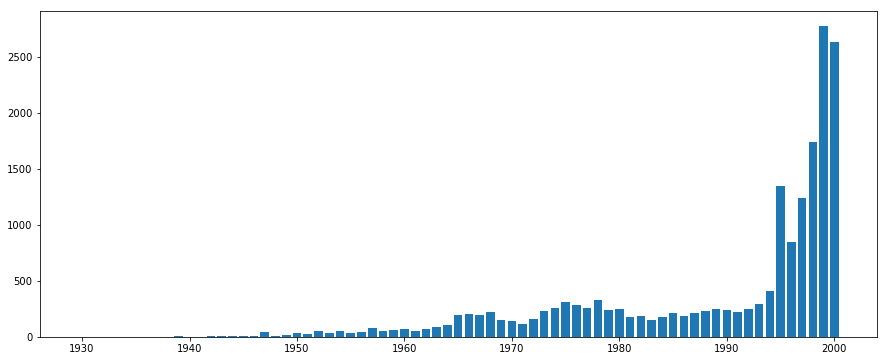

In [14]:
ufo_years = data["Year"].value_counts()
plt.figure(figsize=(15,6))
plt.bar(ufo_years.index, ufo_years) # niezła histeria po 1995 ;)

In [15]:
# bierzemy jeszcze miesiące
data["Month"] = data["Time"].apply(lambda x : int(str(x)[5:7]))

<Container object of 12 artists>

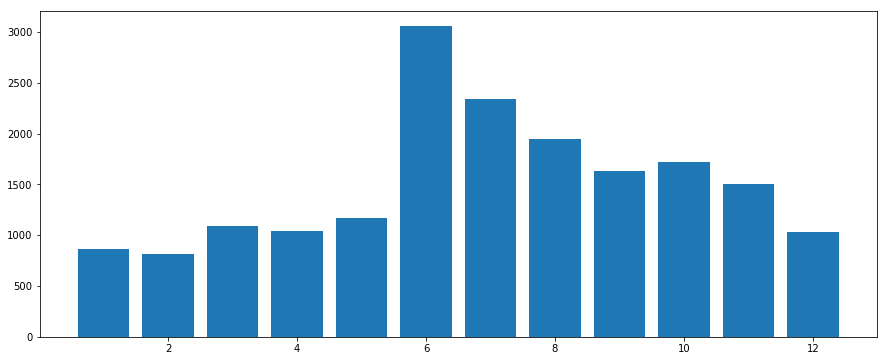

In [16]:
ufo_months = data["Month"].value_counts()
plt.figure(figsize=(15,6))
plt.bar(ufo_months.index, ufo_months) # bardzo interesujące - najwięcej obserwacji latem, najmniej w miesiącach zimowych

In [17]:
# sens ma chyba jeszcze wzięcie pory dnia
data["Hour"] = data["Time"].apply(lambda x : int(str(x)[11:13]))

<Container object of 24 artists>

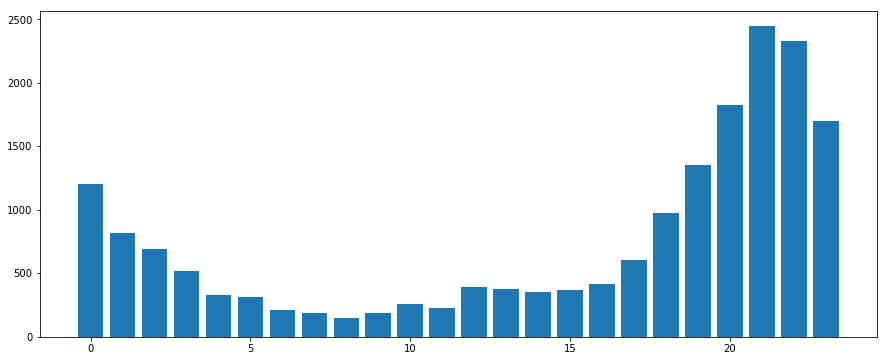

In [18]:
ufo_hours = data["Hour"].value_counts()
plt.figure(figsize=(15,6))
plt.bar(ufo_hours.index, ufo_hours) # zdecydowanie najwięcej obserwacji od popołudnia do nocy

In [19]:
# z ciekawości - warto zobaczyć, jakie to dni tygodnia
data["Weekday"] = data["Time"].apply(pd.Timestamp.weekday)

<Container object of 7 artists>

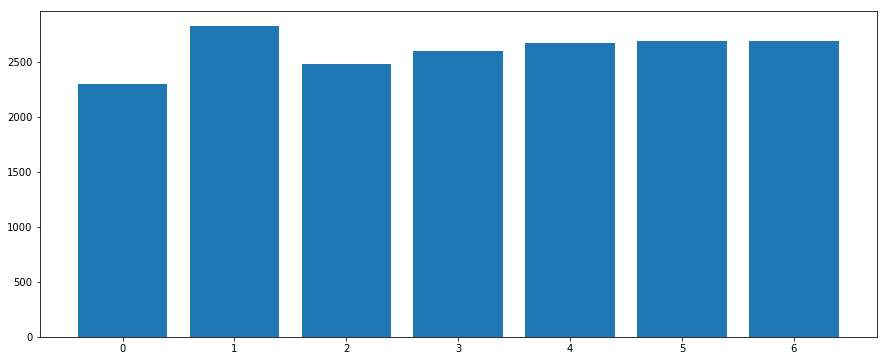

In [20]:
ufo_weekdays = data["Weekday"].value_counts()
plt.figure(figsize=(15,6))
plt.bar(ufo_weekdays.index, ufo_weekdays) # "Wtorki z UFO" :)

In [21]:
# takie mamy teraz kolumny
data.columns

Index(['Colors Reported', 'Shape Reported', 'State', 'Time', 'Year', 'Month',
       'Hour', 'Weekday'],
      dtype='object')

In [22]:
# teraz trzeba się zająć kolorami i kształtami

In [23]:
data["Colors Reported"].value_counts() # RED, GREEN, ORANGE, BLUE, YELLOW - tylko te kolory występują

RED                       780
GREEN                     531
ORANGE                    528
BLUE                      450
YELLOW                    169
RED GREEN                  89
RED BLUE                   78
RED ORANGE                 44
GREEN BLUE                 34
RED GREEN BLUE             33
ORANGE YELLOW              26
RED YELLOW                 25
ORANGE GREEN               23
YELLOW GREEN               17
ORANGE BLUE                10
RED YELLOW GREEN            9
YELLOW BLUE                 6
ORANGE GREEN BLUE           5
YELLOW GREEN BLUE           5
RED ORANGE YELLOW           4
RED YELLOW GREEN BLUE       4
RED ORANGE BLUE             3
RED ORANGE GREEN            3
RED YELLOW BLUE             3
ORANGE YELLOW BLUE          1
RED ORANGE YELLOW BLUE      1
ORANGE YELLOW GREEN         1
Name: Colors Reported, dtype: int64

In [24]:
# wystarczyłoby zamienić tę kolumnę na pięć kolorów i oznaczyć 1 jeśli dany kolor występuje lub 0 jeśli nie
data["Red"] = data["Colors Reported"].str.contains("RED")
data["Green"] = data["Colors Reported"].str.contains("GREEN")
data["Blue"] = data["Colors Reported"].str.contains("BLUE")
data["Yellow"] = data["Colors Reported"].str.contains("YELLOW")
data["Orange"] = data["Colors Reported"].str.contains("ORANGE")

In [25]:
# i pozbywamy się kolumny Colors Reported
# jedyny problem jest taki, że tylko 16% obserwacji w ogóle zawiera informację o kolorach - trzeba będzie coś z tym zrobić
data.drop("Colors Reported", axis=1, inplace=True)

In [26]:
# teraz kształty:
data["Shape Reported"].value_counts() # najwięcej obserwacji to LIGHT, DISK, TRIANGLE

LIGHT        2803
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
CRESCENT        2
ROUND           2
PYRAMID         1
HEXAGON         1
FLARE           1
DOME            1
Name: Shape Reported, dtype: int64

In [27]:
# teraz mamy kilka możliwości - albo zostawiamy, jak jest, albo decydujemy się na zmniejszenie liczby kategorii
# możemy albo popakować podobne kształy - np. CIRCLE+SPHERE+OVAL+EGG+ROUND, LIGHT+FIREBALL+FLASH+FLARE...
# ...albo odciąć na poziomie np. 200 i jeśli kategoria ma poniżej - przesunąć do OTHER
#
# albo jedno i drugie :)

In [28]:
# na początek spróbujmy z samym odcięciem - ale przy liczbie 100, czyli od CONE w dół
lows = tuple(data["Shape Reported"].value_counts()[data["Shape Reported"].value_counts() < 100].keys())
data["Shape Reported"][data["Shape Reported"].isin(lows)] = "OTHER"

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
data["Shape Reported"].value_counts() # teraz trochę lepiej

LIGHT        2803
DISK         2122
TRIANGLE     1889
OTHER        1513
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
Name: Shape Reported, dtype: int64

In [30]:
# Tak teraz wygląda nasz zbiór danych
data.rename_axis({"Shape Reported": "Shape"}, axis=1, inplace=True)
data

,Shape,State,Time,Year,Month,Hour,Weekday,Red,Green,Blue,Yellow,Orange
0,TRIANGLE,NY,1930-06-01 22:00:00,1930,6,22,6,NaN,NaN,NaN,NaN,NaN
1,OTHER,NJ,1930-06-30 20:00:00,1930,6,20,0,NaN,NaN,NaN,NaN,NaN
2,OVAL,CO,1931-02-15 14:00:00,1931,2,14,6,NaN,NaN,NaN,NaN,NaN
3,DISK,KS,1931-06-01 13:00:00,1931,6,13,0,NaN,NaN,NaN,NaN,NaN
4,LIGHT,NY,1933-04-18 19:00:00,1933,4,19,1,NaN,NaN,NaN,NaN,NaN
5,DISK,ND,1934-09-15 15:30:00,1934,9,15,5,NaN,NaN,NaN,NaN,NaN
6,CIRCLE,CA,1935-06-15 00:00:00,1935,6,0,5,NaN,NaN,NaN,NaN,NaN
7,DISK,MI,1936-07-15 00:00:00,1936,7,0,2,NaN,NaN,NaN,NaN,NaN
8,CIGAR,AK,1936-10-15 17:00:00,1936,10,17,3,NaN,NaN,NaN,NaN,NaN
9,CYLINDER,OR,1937-06-15 00:00:00,1937,6,0,1,NaN,NaN,NaN,NaN,NaN


In [31]:
# trzeba jeszcze coś zrobić z tymi kolorami oraz kształtami, gdzie "nie podano"
# najlepiej oddać prawdę - tam, gdzie nie sprecyzowano kształtu podać 0
# tak samo, jak w sytuacji, gdy nie stwierdzono danego koloru
data["Shape"][data["Shape"].isnull()] = "NONE"
data.fillna(0, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [32]:
data["Red"] = data["Red"].astype(int, copy=False)
data["Green"] = data["Green"].astype(int, copy=False)
data["Blue"] = data["Blue"].astype(int, copy=False)
data["Orange"] = data["Orange"].astype(int, copy=False)
data["Yellow"] = data["Yellow"].astype(int, copy=False)

In [33]:
# spróbujmy zbić kształty w jeszcze mniej kategorii
"""
LIGHT        2803
FIREBALL     1039
FLASH         188

TRIANGLE     1889

OTHER        1513

DISK         2122
CIRCLE       1365
SPHERE       1054
OVAL          845
EGG           197
TEARDROP      119

CIGAR         617
CYLINDER      294

FORMATION     434
VARIOUS       333
CHEVRON       248

RECTANGLE     303
DIAMOND       234
"""
data2 = data

In [34]:
# arbitralnie ustalamy, że:
data2["Shape"][data2["Shape"].isin(['LIGHT','FIREBALL', 'FLASH'])] = "LIGHTS"
data2["Shape"][data2["Shape"].isin(['DISK', 'CIRCLE','SPHERE', 'OVAL', 'EGG', 'TEARDROP'])] = "ROUND"
data2["Shape"][data2["Shape"].isin(['CIGAR', 'CYLINDER'])] = "CYLINDRICAL"
data2["Shape"][data2["Shape"].isin(['FORMATION', 'VARIOUS', 'CHEVRON'])] = "FORMATION"
data2["Shape"][data2["Shape"].isin(['RECTANGLE', 'DIAMOND'])] = "RECTANGULAR"

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\

In [35]:
data2.Shape.value_counts() # o wiele lepiej

ROUND          5702
LIGHTS         4030
NONE           2644
TRIANGLE       1889
OTHER          1513
FORMATION      1015
CYLINDRICAL     911
RECTANGULAR     537
Name: Shape, dtype: int64

In [36]:
data2.Month.value_counts() # dla przypomnienia - możemy to zmienić na porę roku

6     3059
7     2345
8     1948
10    1723
9     1635
11    1509
5     1168
3     1096
4     1045
12    1034
1      862
2      817
Name: Month, dtype: int64

In [37]:
data2["Season"] = ''
data2["Season"][data2["Month"].isin((12, 1, 2))] = 'WINTER'
data2["Season"][data2["Month"].isin((3, 4, 5))] = 'SPRING'
data2["Season"][data2["Month"].isin((6, 7, 8))] = 'SUMMER'
data2["Season"][data2["Month"].isin((9, 10, 11))] = 'FALL'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\

In [38]:
data2.drop("Month", axis=1, inplace=True)

In [39]:
data2.drop("Weekday", axis=1, inplace=True)

In [40]:
from datetime import datetime as dt

In [41]:
data["Timestamp"] = data2["Time"].apply(lambda x : (x.to_pydatetime() - dt(1900, 1, 1)).total_seconds())

In [42]:
data3 = data2.drop(["Time", "Year", "Hour"], axis=1)

In [43]:
data3 = pd.get_dummies(data3)

In [44]:
from sklearn.cluster import DBSCAN, Birch, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [45]:
data3.corr()

,Red,Green,Blue,Yellow,Orange,Timestamp,Shape_CYLINDRICAL,Shape_FORMATION,Shape_LIGHTS,Shape_NONE,...,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Season_FALL,Season_SPRING,Season_SUMMER,Season_WINTER
Red,1.000000,0.109319,0.107633,0.057728,0.020999,0.056325,-0.012539,-0.009007,0.032686,0.008616,...,0.000664,-0.007568,0.003606,0.008300,-0.004904,-0.007847,0.017837,-0.004342,-0.024990,0.016980
Green,0.109319,1.000000,0.082509,0.056450,0.007691,0.070556,-0.024852,-0.015564,0.089227,-0.009615,...,-0.005117,0.001017,0.038615,-0.009457,-0.001483,-0.003823,0.052813,-0.014135,-0.049912,0.018464
Blue,0.107633,0.082509,1.000000,0.026234,-0.004077,0.051086,-0.007719,-0.012051,0.048482,0.008719,...,0.017985,-0.003217,0.026715,-0.009490,-0.009120,-0.006804,0.009552,-0.000644,-0.016567,0.011662
Yellow,0.057728,0.056450,0.026234,1.000000,0.057141,0.034803,0.000969,-0.004111,0.023077,0.002213,...,0.005560,-0.006039,0.009367,-0.000994,0.005554,-0.000185,-0.004413,0.011570,-0.010371,0.007251
Orange,0.020999,0.007691,-0.004077,0.057141,1.000000,0.040423,-0.001919,0.011474,0.036820,-0.031164,...,-0.003818,0.002621,-0.005748,0.015593,-0.016399,-0.007014,0.015280,-0.004402,-0.023276,0.017860
Timestamp,0.056325,0.070556,0.051086,0.034803,0.040423,1.000000,-0.078477,0.051616,0.132917,0.060024,...,-0.016498,-0.005760,0.078881,0.014301,-0.017836,-0.001697,0.114132,0.071337,-0.239530,0.111072
Shape_CYLINDRICAL,-0.012539,-0.024852,-0.007719,0.000969,-0.001919,-0.078477,1.000000,-0.055655,-0.122096,-0.094400,...,0.010044,0.009248,-0.021379,0.007577,0.001210,0.002271,-0.010282,-0.004088,0.030695,-0.025105
Shape_FORMATION,-0.009007,-0.015564,-0.012051,-0.004111,0.011474,0.051616,-0.055655,1.000000,-0.129265,-0.099943,...,-0.003084,-0.007061,-0.002362,-0.004946,-0.009438,-0.003270,0.023889,0.019161,-0.035637,-0.001319
Shape_LIGHTS,0.032686,0.089227,0.048482,0.023077,0.036820,0.132917,-0.122096,-0.129265,1.000000,-0.219255,...,-0.013589,-0.001942,-0.005642,0.013477,-0.003372,0.001627,0.036965,-0.022653,-0.031865,0.022510
Shape_NONE,0.008616,-0.009615,0.008719,0.002213,-0.031164,0.060024,-0.094400,-0.099943,-0.219255,1.000000,...,0.003263,0.011499,0.123353,-0.007584,0.001593,0.005070,-0.036427,0.043791,-0.051004,0.068165


In [46]:
X = StandardScaler().fit_transform(data3)

In [47]:
db = DBSCAN(eps=0.1, metric='euclidean', min_samples=10).fit(X)

In [48]:
len(set(db.labels_))

208

In [49]:
pd.Series(db.labels_).value_counts()

-1      13582
 27       126
 30        96
 67        91
 36        86
 42        83
 68        78
 14        68
 41        62
 56        62
 40        62
 98        61
 28        59
 33        57
 105       56
 32        52
 62        49
 77        49
 34        49
 60        48
 51        44
 39        42
 2         41
 96        40
 53        38
 94        38
 75        36
 95        36
 107       35
 91        34
        ...  
 16        10
 160       10
 177       10
 191       10
 130       10
 25        10
 206       10
 190       10
 189       10
 172       10
 12        10
 186       10
 170       10
 138       10
 185       10
 178       10
 169       10
 184       10
 24        10
 183       10
 23        10
 22        10
 6         10
 69        10
 195       10
 19        10
 0         10
 203        7
 188        7
 7          6
Length: 208, dtype: int64

In [50]:
pca = PCA(n_components=2).fit(X)

In [51]:
pca.explained_variance_ratio_

array([ 0.02751153,  0.02060716])

In [52]:
pca_2d = pca.transform(X)

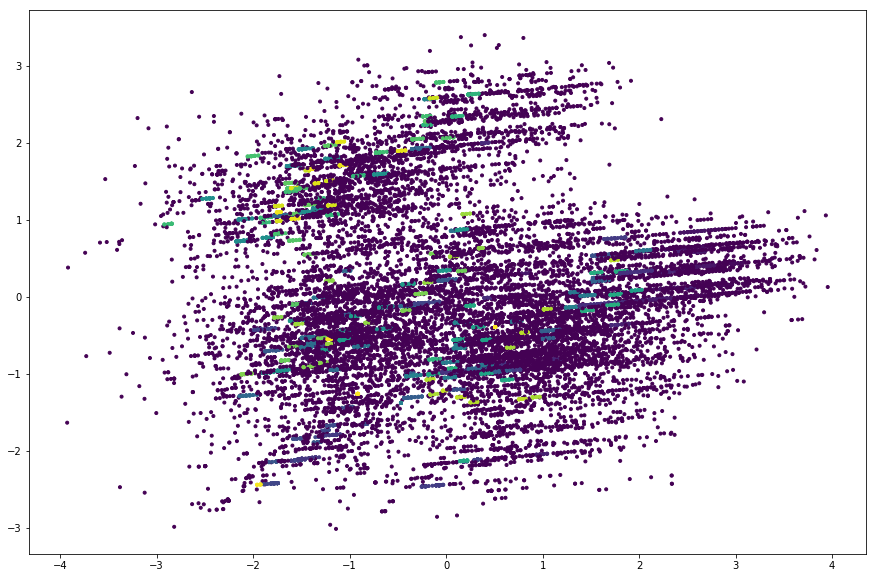

In [53]:
plt.figure(figsize=(15,10))
plt.scatter(pca_2d[:,0], pca_2d[:,1], c=db.labels_, marker='.')

In [54]:
pd.Series(db.labels_).value_counts()

-1      13582
 27       126
 30        96
 67        91
 36        86
 42        83
 68        78
 14        68
 41        62
 56        62
 40        62
 98        61
 28        59
 33        57
 105       56
 32        52
 62        49
 77        49
 34        49
 60        48
 51        44
 39        42
 2         41
 96        40
 53        38
 94        38
 75        36
 95        36
 107       35
 91        34
        ...  
 16        10
 160       10
 177       10
 191       10
 130       10
 25        10
 206       10
 190       10
 189       10
 172       10
 12        10
 186       10
 170       10
 138       10
 185       10
 178       10
 169       10
 184       10
 24        10
 183       10
 23        10
 22        10
 6         10
 69        10
 195       10
 19        10
 0         10
 203        7
 188        7
 7          6
Length: 208, dtype: int64

In [56]:
states = data2["State"].value_counts()
# states = list(set(data2["State"].values)).sort(key=data2["State"].value_counts)
states = list(states.index)

In [58]:
data2["NumStates"] = data2["State"].apply(states.index)
states.index('FL')

4

In [ ]:
data2

In [ ]:
data2["NumStates"].value_counts()

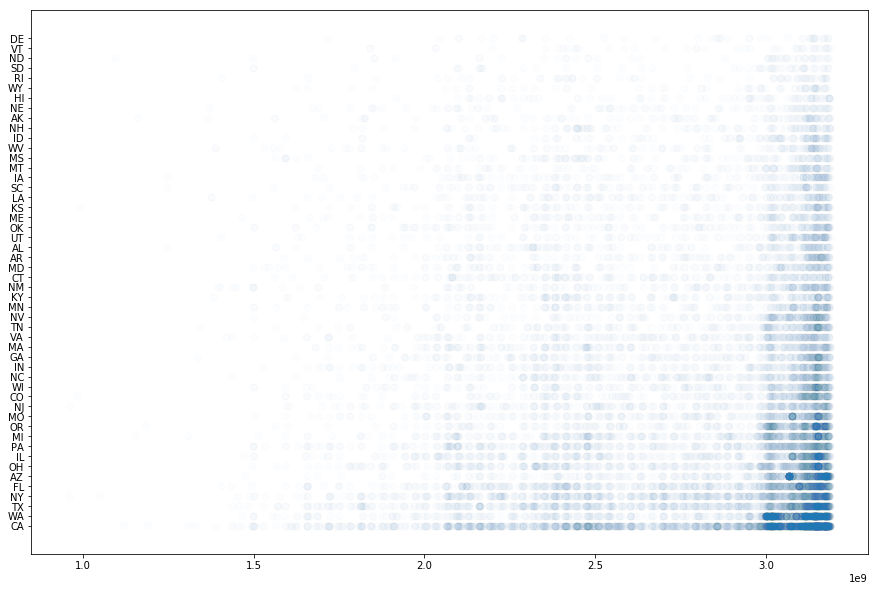

In [86]:
plt.figure(figsize=(15,10))
plt.yticks(range(50), states)
plt.scatter(data2["Timestamp"], data2["NumStates"], alpha=0.01, s=50)
# tu widać, że zbiór danych jest mocno zachwiany - spróbujmy klasteryzować tylko po stanie i czasie obserwacji

In [99]:
data4 = data2[["NumStates", "Timestamp"]]

In [90]:
# data4 = pd.get_dummies(data4)

In [140]:
X = StandardScaler().fit_transform(data4)
db = DBSCAN(eps=0.1, metric='euclidean', min_samples=20).fit(X)
pd.Series(db.labels_).value_counts()

 0     16408
-1      1413
 3       118
 2       113
 6        34
 11       31
 9        24
 4        20
 10       19
 7        18
 5        15
 8        14
 1        14
dtype: int64

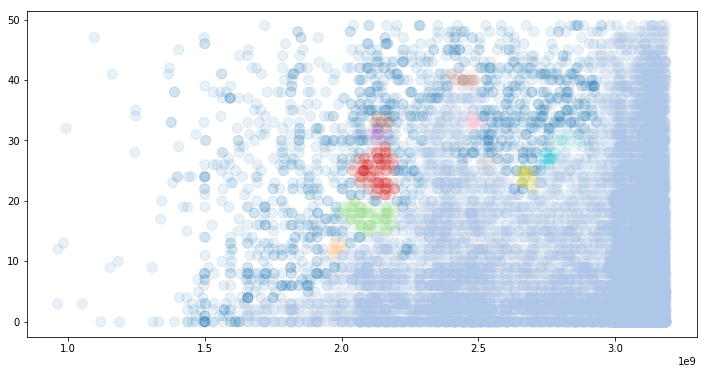

In [147]:
plt.figure(figsize=(12,6))
plt.scatter(data4["Timestamp"], data4["NumStates"], c=db.labels_, marker='o', cmap="tab20", alpha=0.1, s=100)